In [ ]:
# Transformer Health Prediction - ML Pipeline in Google Colab

In [ ]:
## 📦 Step 1: Install Libraries
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 77.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [ ]:
## 📁 Step 2: Upload Dataset
from google.colab import files
uploaded = files.upload()

Saving synthetic_dataset_cleaned.csv to synthetic_dataset_cleaned (1).csv


In [ ]:
!pip install --upgrade --force-reinstall numpy pandas scikit-learn matplotlib seaborn


import pandas as pd
df = pd.read_csv("/content/synthetic_dataset_cleaned (1).csv")
df.head()

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached matplotlib-3.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.1-cp311-cp311-manylinux_2_17_

,2-FAL,DP,Condition
0,0.037454,1036.351497,Healthy
1,0.095071,1098.340699,Healthy
2,0.073199,825.233949,Healthy
3,0.059866,1012.437050,Healthy
4,0.015602,985.872992,Healthy


In [ ]:
import pandas as pd

# Load the CSV file (adjust the path as needed)
df = pd.read_csv("/content/synthetic_dataset_cleaned.csv")

# View the first few rows (optional)
df.head()
# 🔍 Step 3: Data Preprocessing
X = df[['2-FAL', 'DP']]
y_class = df['Condition']


In [ ]:
# ## 🔍 Step 3: Data Preprocessing
# # Assume 'Health Condition' is the classification label
# X = df[['2-FAL', 'DP']]
# y_class = df['Health Condition']

In [ ]:
# For regression, use numerical mapping (optional)
from sklearn.preprocessing import LabelEncoder
y_reg = LabelEncoder().fit_transform(df['Condition'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm).plot()


In [ ]:
## 📊 Step 4: Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
_, _, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

In [ ]:
## 🧠 Step 5: Train Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
models_class = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC()
}

In [ ]:
for name, model in models_class.items():
    model.fit(X_train, y_train_class)
    acc = model.score(X_test, y_test_class)
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 1.0000
Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000
SVC Accuracy: 0.9850


In [ ]:
## 🧠 Step 6: Train Regression Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [ ]:
models_reg = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "SVR": SVR(),
    "XGBoost Regressor": XGBRegressor()
}

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
for name, model in models_reg.items():
    model.fit(X_train, y_train_reg)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
    r2 = r2_score(y_test_reg, y_pred)
    print(f"{name} → RMSE: {rmse:.4f}, R2: {r2:.4f}")

Decision Tree Regressor → RMSE: 0.0000, R2: 1.0000
Random Forest Regressor → RMSE: 0.0125, R2: 0.9999
SVR → RMSE: 0.2403, R2: 0.9510
XGBoost Regressor → RMSE: 0.0000, R2: 1.0000


In [ ]:
## 📈 Step 7: Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

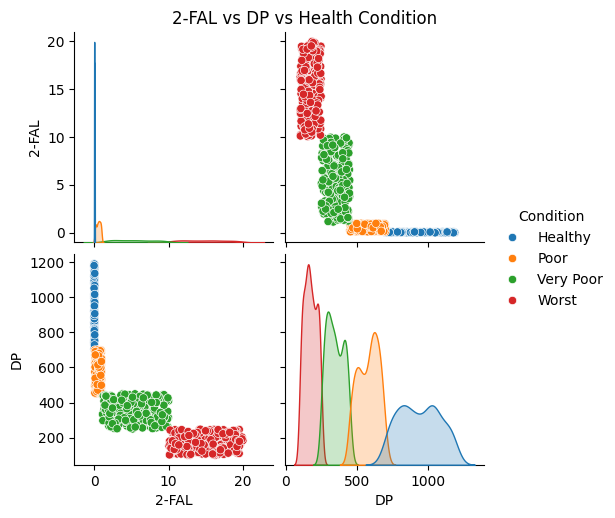

In [ ]:
sns.pairplot(df, hue="Condition")
plt.suptitle("2-FAL vs DP vs Health Condition", y=1.02)
plt.show()

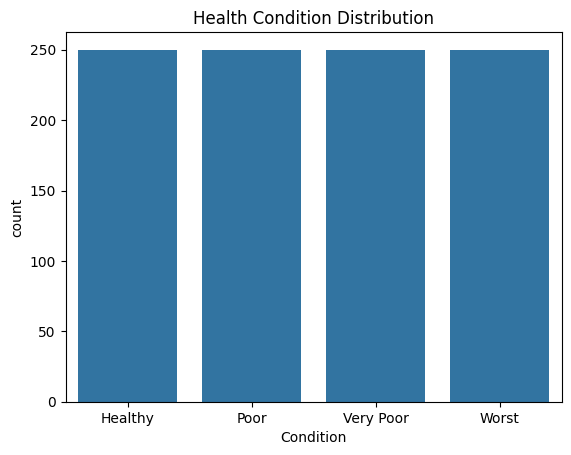

In [ ]:
sns.countplot(x="Condition", data=df)
plt.title("Health Condition Distribution")
plt.show()

In [ ]:
## 🔢 Step 8: Real-time Prediction
fal = float(input("Enter 2-FAL value: "))
dp = float(input("Enter DP value: "))
input_df = pd.DataFrame([[fal, dp]], columns=["2-FAL", "DP"])

Enter 2-FAL value: 1036.57
Enter DP value: 567


In [ ]:
svc_model = models_class["SVC"]
pred = svc_model.predict(input_df)
print("Predicted Health Condition:", pred[0])

Predicted Health Condition: Healthy


In [ ]:

# ⚙️ Step 9: Save Trained Models as Pickle Files
import pickle

for name, model in models_class.items():
    with open(f"{name.replace(' ', '_')}_classifier.pkl", "wb") as f:
        pickle.dump(model, f)

for name, model in models_reg.items():
    with open(f"{name.replace(' ', '_')}_regressor.pkl", "wb") as f:
        pickle.dump(model, f)

print("✅ All models saved as .pkl files.")

# 🖥️ Step 10: Streamlit App Code (Optional: Run in separate script locally)
streamlit_code = """
import streamlit as st
import pandas as pd
import pickle

st.title("🧠 Transformer Health Prediction")

# Load models
with open('SVC_classifier.pkl', 'rb') as f:
    model = pickle.load(f)

# User Input
fal = st.number_input("Enter 2-FAL value", min_value=0.0)
dp = st.number_input("Enter DP value", min_value=0.0)

if st.button("Predict"):
    input_df = pd.DataFrame([[fal, dp]], columns=['2-FAL', 'DP'])
    prediction = model.predict(input_df)
    st.success(f"Predicted Health Condition: {prediction[0]}")
"""

# Save streamlit code to .py file
with open("streamlit_app.py", "w") as f:
    f.write(streamlit_code)

print("✅ Streamlit app code saved to streamlit_app.py")

✅ All models saved as .pkl files.
✅ Streamlit app code saved to streamlit_app.py


In [ ]:
!pip install streamlit ngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving synthetic_dataset_cleaned (1).csv to synthetic_dataset_cleaned (1) (2).csv
Saving XGBoost_Regressor_regressor.pkl to XGBoost_Regressor_regressor (3).pkl
Saving streamlit_app.py to streamlit_app (3).py
Saving SVC_classifier.pkl to SVC_classifier (3).pkl
Saving SVR_regressor.pkl to SVR_regressor (3).pkl
Saving Random_Forest_classifier.pkl to Random_Forest_classifier (3).pkl
Saving Random_Forest_Regressor_regressor.pkl to Random_Forest_Regressor_regressor (3).pkl
Saving Logistic_Regression_classifier.pkl to Logistic_Regression_classifier (3).pkl
Saving Decision_Tree_classifier.pkl to Decision_Tree_classifier (3).pkl
Saving Decision_Tree_Regressor_regressor.pkl to Decision_Tree_Regressor_regressor (3).pkl


In [ ]:
!pip install streamlit pyngrok --quiet


In [ ]:
import os
import threading
import time
from pyngrok import ngrok

# Kill any previous streamlit processes (just in case)
os.system("pkill streamlit")

# Set your ngrok authtoken
ngrok.set_auth_token("2pOz8o3n13TiAKwn22yEYI4HytK_4Kj9qfXbRNBStLBSYkAVU")

# Connect to the default Streamlit port using the new format
!pkill -f ngrok

public_url = ngrok.connect(addr="8501", proto="http")
print(f"🔥 Your Streamlit app is live at: {public_url}")

# Run streamlit in a background thread
def run():
    os.system("streamlit run streamlit_app.py")

thread = threading.Thread(target=run)
thread.start()

# Wait a moment to ensure the app starts
time.sleep(5)


🔥 Your Streamlit app is live at: NgrokTunnel: "https://7976-104-154-201-224.ngrok-free.app" -> "http://localhost:8501"


In [ ]:

# !pip install streamlit pyngrok pandas scikit-learn seaborn matplotlib plotly


In [ ]:
# st.subheader("📊 Uploaded Data")
# st.write(df.head())

# if '2-FAL' in df.columns and 'DP' in df.columns:
#     X_new = df[['2-FAL', 'DP']]

#     # Load models
#     with open("logistic_model.pkl", "rb") as f:
#         logistic_model = pickle.load(f)
#     with open("dt_model.pkl", "rb") as f:
#         dt_model = pickle.load(f)
#     with open("rf_model.pkl", "rb") as f:
#         rf_model = pickle.load(f)
#     with open("svc_model.pkl", "rb") as f:
#         svc_model = pickle.load(f)

#     # Predict using all models
#     df["Logistic_Pred"] = logistic_model.predict(X_new)
#     df["DecisionTree_Pred"] = dt_model.predict(X_new)
#     df["RandomForest_Pred"] = rf_model.predict(X_new)
#     df["SVC_Pred"] = svc_model.predict(X_new)

#     st.subheader("📋 Predictions")
#     st.write(df)

#     # Visualizations
#     st.subheader("📈 Visualizations")

#     # 1. Pairplot
#     fig1 = sns.pairplot(df, vars=["2-FAL", "DP"], hue="Logistic_Pred")
#     st.pyplot(fig1)

#     # 2. Correlation Heatmap
#     st.markdown("#### 🔥 Correlation Heatmap")
#     fig2, ax = plt.subplots()
#     sns.heatmap(df[["2-FAL", "DP"]].corr(), annot=True, cmap="coolwarm", ax=ax)
#     st.pyplot(fig2)

#     # 3. Prediction Distribution Bar Plot
#     st.markdown("#### 🧠 Prediction Counts (Random Forest)")
#     pred_counts = df["RandomForest_Pred"].value_counts().reset_index()
#     pred_counts.columns = ["Health Condition", "Count"]
#     fig3 = px.bar(pred_counts, x="Health Condition", y="Count", color="Health Condition")
#     st.plotly_chart(fig3)

# else:
#     st.error("Please ensure the uploaded file has '2-FAL' and 'DP' columns.")


NameError: name 'st' is not defined

In [ ]:
# import os
# import threading
# import time
# from pyngrok import ngrok

# # Kill any existing Streamlit process (just in case)
# os.system("pkill streamlit")

# # Authenticate ngrok (only needed once)
# ngrok.set_auth_token("2pOz8o3n13TiAKwn22yEYI4HytK_4Kj9qfXbRNBStLBSYkAVU")

# # Connect ngrok to Streamlit's default port
# public_url = ngrok.connect(addr="8501", proto="http")
# print(f"🔥 Your Streamlit app is live at: {public_url}")

# # Run Streamlit app in background
# def run_app():
#     os.system("streamlit run streamlit_app.py")

# thread = threading.Thread(target=run_app)
# thread.start()

# # Wait a bit for the app to start
# time.sleep(5)



PyngrokNgrokHTTPError: ngrok client exception, API returned 502: {"error_code":103,"status_code":502,"msg":"failed to start tunnel","details":{"err":"failed to start tunnel: Your account may not run more than 3 tunnels over a single ngrok agent session.\nThe tunnels already running on this session are:\ntn_2vLcbtyx0TXl9KY76C3QwKtAhTH, tn_2vLdC87xGHEoz1mAeRs1vXk2AWQ, tn_2vLeUoD7GMsJCOKGMyZ0NO9NhKW\n\r\n\r\nERR_NGROK_324\r\n"}}


In [ ]:
!pip install scikit-learn pandas --quiet


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload logistic_model.pkl, dt_model.pkl, rf_model.pkl, svc_model.pkl


Saving synthetic_dataset_cleaned (1).csv to synthetic_dataset_cleaned (1) (3).csv
Saving XGBoost_Regressor_regressor.pkl to XGBoost_Regressor_regressor (4).pkl
Saving streamlit_app.py to streamlit_app (4).py
Saving SVC_classifier.pkl to SVC_classifier (4).pkl
Saving SVR_regressor.pkl to SVR_regressor (4).pkl
Saving Random_Forest_classifier.pkl to Random_Forest_classifier (4).pkl
Saving Random_Forest_Regressor_regressor.pkl to Random_Forest_Regressor_regressor (4).pkl
Saving Logistic_Regression_classifier.pkl to Logistic_Regression_classifier (4).pkl
Saving Decision_Tree_classifier.pkl to Decision_Tree_classifier (4).pkl
Saving Decision_Tree_Regressor_regressor.pkl to Decision_Tree_Regressor_regressor (4).pkl


In [ ]:
import pickle
import numpy as np

# Load the models
with open("Logistic_Regression_classifier.pkl", "rb") as f:
    logistic_model = pickle.load(f)

with open("Decision_Tree_classifier.pkl", "rb") as f:
    dt_model = pickle.load(f)

with open("Random_Forest_classifier.pkl", "rb") as f:
    rf_model = pickle.load(f)

with open("SVC_classifier.pkl", "rb") as f:
    svc_model = pickle.load(f)

# Function to get user input
def get_user_input():
    print("Enter input values for prediction:")
    two_fal = float(input("Enter 2-FAL value: "))
    dp = float(input("Enter DP value: "))
    return np.array([[two_fal, dp]])

# Get user input
X_input = get_user_input()

# Predict using all models
logistic_pred = logistic_model.predict(X_input)[0]
dt_pred = dt_model.predict(X_input)[0]
rf_pred = rf_model.predict(X_input)[0]
svc_pred = svc_model.predict(X_input)[0]

# Print results
print("\n🧠 Model Predictions:")
print(f"Logistic Regression Prediction:     {logistic_pred}")
print(f"Decision Tree Prediction:           {dt_pred}")
print(f"Random Forest Prediction:           {rf_pred}")
print(f"Support Vector Machine Prediction:  {svc_pred}")


Enter input values for prediction:
Enter 2-FAL value: 0.0347
Enter DP value: 5678

🧠 Model Predictions:
Logistic Regression Prediction:     Healthy
Decision Tree Prediction:           Healthy
Random Forest Prediction:           Healthy
Support Vector Machine Prediction:  Healthy


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
!pip install pyngrok streamlit
!pkill streamlit  # kill any previous streamlit runs


In [ ]:
!pip install streamlit pyngrok --quiet
!pkill streamlit  # Kill any old instance
!ngrok config add-authtoken 2pOz8o3n13TiAKwn22yEYI4HytK_4Kj9qfXbRNBStLBSYkAVU


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
%%writefile streamlit_app.py
import streamlit as st
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

st.title("🩺 Health Condition Prediction App")

uploaded_file = st.file_uploader("📤 Upload your CSV or Excel file", type=["csv", "xlsx"])

if uploaded_file is not None:
    if uploaded_file.name.endswith('.csv'):
        df = pd.read_csv(uploaded_file)
    else:
        df = pd.read_excel(uploaded_file)

    st.subheader("📊 Uploaded Data")
    st.write(df.head())

    if '2-FAL' in df.columns and 'DP' in df.columns:
        X_new = df[['2-FAL', 'DP']]

        # Load models
        with open("Logistic_Regression_classifier.pkl", "rb") as f:
            logistic_model = pickle.load(f)
        with open("Decision_Tree_classifier.pkl", "rb") as f:
            dt_model = pickle.load(f)
        with open("Random_Forest_classifier.pkl", "rb") as f:
            rf_model = pickle.load(f)
        with open("SVC_classifier.pkl", "rb") as f:
            svc_model = pickle.load(f)

        # Predict using all models
        df["Logistic_Pred"] = logistic_model.predict(X_new)
        df["DecisionTree_Pred"] = dt_model.predict(X_new)
        df["RandomForest_Pred"] = rf_model.predict(X_new)
        df["SVC_Pred"] = svc_model.predict(X_new)

        st.subheader("📋 Predictions")
        st.write(df)

        st.subheader("📈 Visualizations")

        fig1 = sns.pairplot(df, vars=["2-FAL", "DP"], hue="Logistic_Pred")
        st.pyplot(fig1)

        st.markdown("#### 🔥 Correlation Heatmap")
        fig2, ax = plt.subplots()
        sns.heatmap(df[["2-FAL", "DP"]].corr(), annot=True, cmap="coolwarm", ax=ax)
        st.pyplot(fig2)

        st.markdown("#### 🧠 Prediction Counts (Random Forest)")
        pred_counts = df["RandomForest_Pred"].value_counts().reset_index()
        pred_counts.columns = ["Health Condition", "Count"]
        fig3 = px.bar(pred_counts, x="Health Condition", y="Count", color="Health Condition")
        st.plotly_chart(fig3)

    else:
        st.error("Please ensure the uploaded file has '2-FAL' and 'DP' columns.")


Overwriting streamlit_app.py


In [ ]:
from pyngrok import ngrok

public_url = ngrok.connect(8500)
print("🌐 App is live at:", public_url)


🌐 App is live at: NgrokTunnel: "https://394d-104-154-201-224.ngrok-free.app" -> "http://localhost:8500"


In [ ]:
!pip install -q streamlit pyngrok openpyxl plotly seaborn
!pkill streamlit || echo "No previous Streamlit instance."


No previous Streamlit instance.


In [ ]:
import streamlit as st
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

st.set_page_config(page_title="🩺 Health Condition Predictor", layout="wide")
st.title("🩺 Health Condition Prediction App")

uploaded_file = st.file_uploader("📤 Upload your CSV or Excel file", type=["csv", "xlsx"])

if uploaded_file is not None:
    try:
        if uploaded_file.name.endswith(".csv"):
            df = pd.read_csv(uploaded_file)
        else:
            df = pd.read_excel(uploaded_file)
    except Exception as e:
        st.error(f"Error reading file: {e}")
        st.stop()

    st.subheader("📊 Uploaded Data")
    st.write(df.head())

    if '2-FAL' in df.columns and 'DP' in df.columns:
        X_new = df[['2-FAL', 'DP']]

        # Load models
        with open("Logistic_Regression_classifier.pkl", "rb") as f:
            logistic_model = pickle.load(f)
        with open("Decision_Tree_classifier.pkl", "rb") as f:
            dt_model = pickle.load(f)
        with open("Random_Forest_classifier.pkl", "rb") as f:
            rf_model = pickle.load(f)
        with open("SVC_classifier.pkl", "rb") as f:
            svc_model = pickle.load(f)

        # Generate predictions
        df["Logistic_Pred"] = logistic_model.predict(X_new)
        df["DecisionTree_Pred"] = dt_model.predict(X_new)
        df["RandomForest_Pred"] = rf_model.predict(X_new)
        df["SVC_Pred"] = svc_model.predict(X_new)

        st.subheader("📋 Predictions")
        st.write(df)

        # Evaluation Metrics if ground truth exists
        if "Condition" in df.columns:
            st.subheader("✅ Model Evaluation Metrics")

            y_true = df["Condition"]
            models = {
                "Logistic Regression": df["Logistic_Pred"],
                "Decision Tree": df["DecisionTree_Pred"],
                "Random Forest": df["RandomForest_Pred"],
                "SVC": df["SVC_Pred"]
            }

            metrics_data = []
            for name, y_pred in models.items():
                acc = accuracy_score(y_true, y_pred)
                rmse = mean_squared_error(y_true, y_pred, squared=False)
                r2 = r2_score(y_true, y_pred)
                metrics_data.append({"Model": name, "Accuracy": acc, "RMSE": rmse, "R² Score": r2})

            metrics_df = pd.DataFrame(metrics_data)
            st.dataframe(metrics_df.style.format({"Accuracy": "{:.2%}", "RMSE": "{:.2f}", "R² Score": "{:.2f}"}))

            st.markdown("#### 📊 Evaluation Metrics Bar Plot")
            fig4 = px.bar(metrics_df.melt(id_vars="Model"), x="Model", y="value", color="variable",
                          barmode="group", title="Evaluation Metrics per Model")
            st.plotly_chart(fig4)

        else:
            st.warning("⚠️ 'Condition' column not found. Evaluation metrics like accuracy, RMSE, and R² cannot be calculated.")

        # Visualizations
        st.subheader("📈 Visualizations")

        st.markdown("#### 🔹 Pairplot")
        fig1 = sns.pairplot(df, vars=["2-FAL", "DP"], hue="Logistic_Pred")
        st.pyplot(fig1)

        st.markdown("#### 🔹 Correlation Heatmap")
        fig2, ax = plt.subplots()
        sns.heatmap(df[["2-FAL", "DP"]].corr(), annot=True, cmap="coolwarm", ax=ax)
        st.pyplot(fig2)

        st.markdown("#### 🔹 Prediction Counts (Random Forest)")
        pred_counts = df["RandomForest_Pred"].value_counts().reset_index()
        pred_counts.columns = ["Health Condition", "Count"]
        fig3 = px.bar(pred_counts, x="Health Condition", y="Count", color="Health Condition")
        st.plotly_chart(fig3)

    else:
        st.error("❌ Columns '2-FAL' and 'DP' not found in uploaded file.")


2025-04-06 09:49:23.015 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-06 09:49:23.021 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-06 09:49:23.255 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-06 09:49:23.258 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-06 09:49:23.265 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-06 09:49:23.269 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-06 09:49:23.276 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [ ]:
# Kill any previously running ngrok or streamlit processes
!pkill -f ngrok
!pkill -f streamlit
print("✅ Killed all ngrok and streamlit processes.")


✅ Killed all ngrok and streamlit processes.


In [ ]:
!Runtime > Restart runtime


/bin/bash: line 1: Runtime: command not found


In [ ]:
from pyngrok import ngrok
import threading
import time
import os

# 🔐 Set your ngrok auth token
ngrok.set_auth_token("2vLhooKiUrPBBnjOnN4Q3WguNdu_Pt2LFSsvcYk9E8w1PhwQ")

# 🚀 Launch Streamlit App
def run():
    os.system("streamlit run streamlit_app.py")

thread = threading.Thread(target=run)
thread.start()

time.sleep(5)  # Wait for streamlit to start

# 🌐 Connect via ngrok
public_url = ngrok.connect(8501)
print("🔗 Your Streamlit App is live at:", public_url)


🔗 Your Streamlit App is live at: NgrokTunnel: "https://d3b4-104-154-201-224.ngrok-free.app" -> "http://localhost:8501"
